In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [27]:
df = pd.read_csv('/content/sample_data/logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [28]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 396030 rows and 27 columns


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [30]:
df.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
annual_inc,float64


In [31]:
df.duplicated().sum()

0

Insights

Dataset has no duplicate values

In [32]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


instights

We have bunch of missing value attributes.

In [33]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


Insights

There is significant difference found in the mean and median of the following attributes
loan_amnt
terms
installment
revol_bal etc.

These attributes might contain outliers

In [34]:
df.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


Insights

Most of the loan disburesed for the 36 months period

Most of the loan applicant have mortgage the home

Majority of loans been fully paid off

Majorily the loans been disbursed for the purpose of debt consolidation

Most of the applicant is Individual

Visualization - Univariate Analysis¶

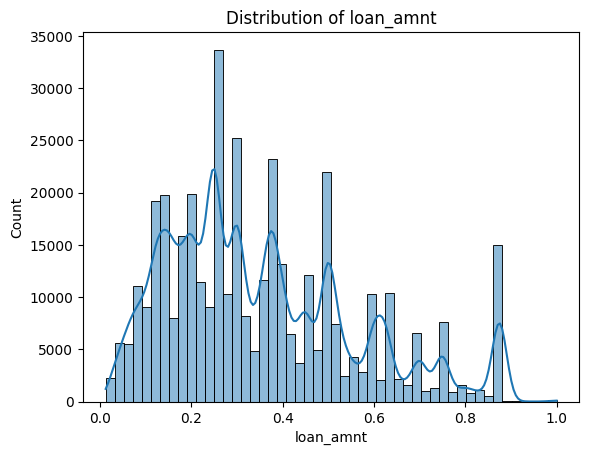

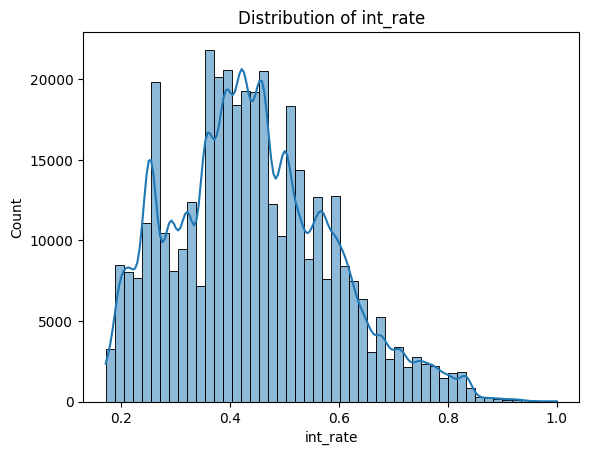

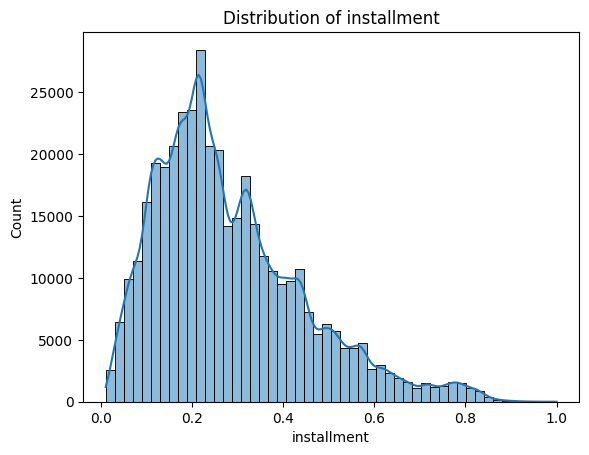

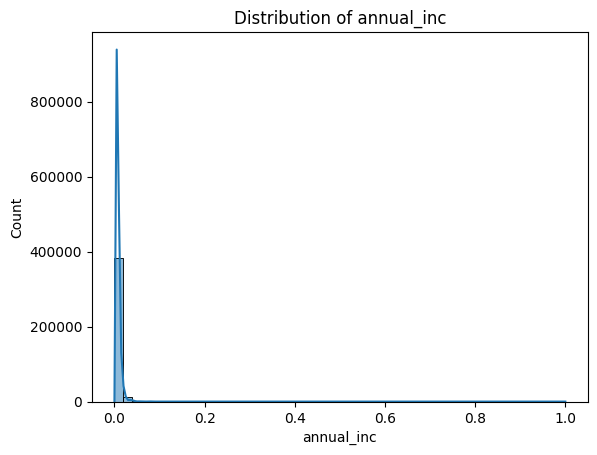

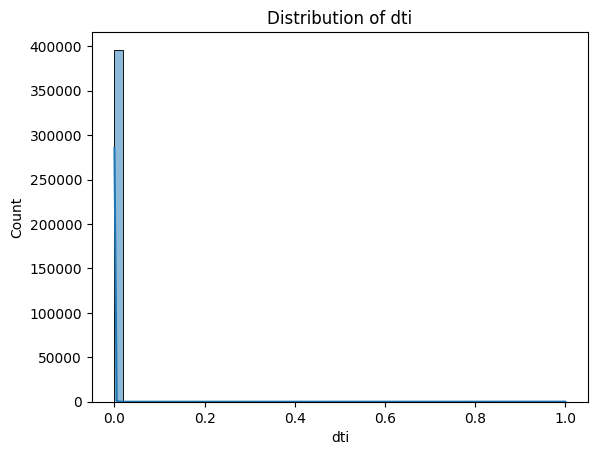

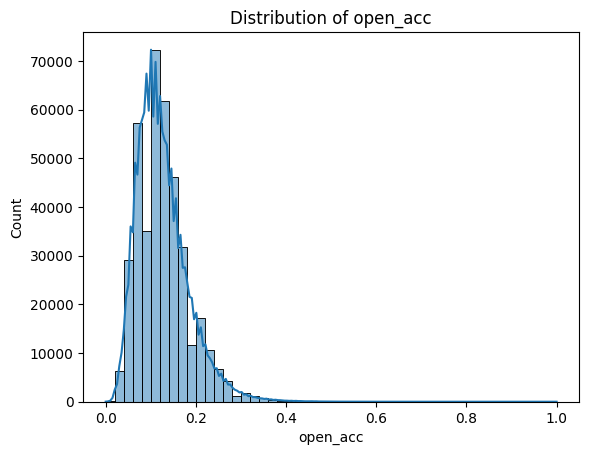

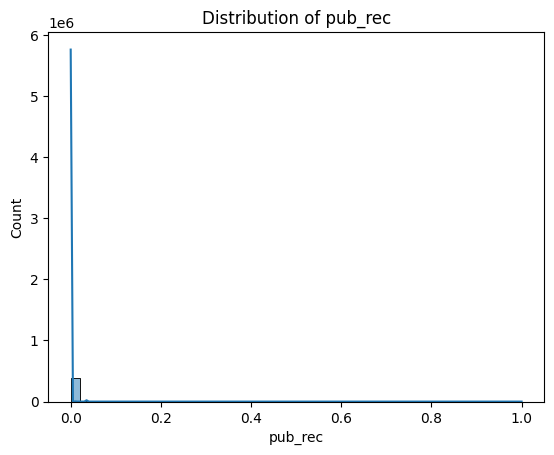

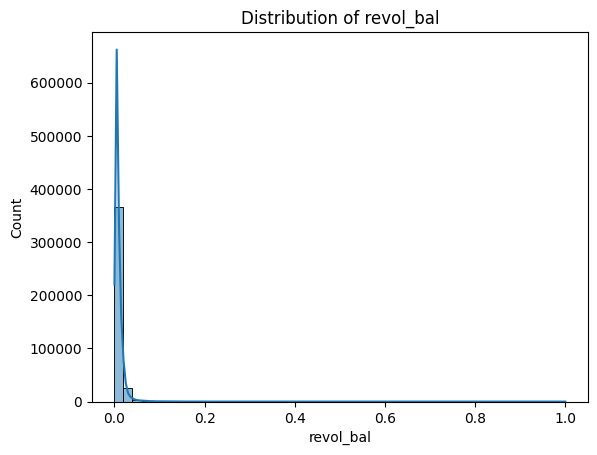

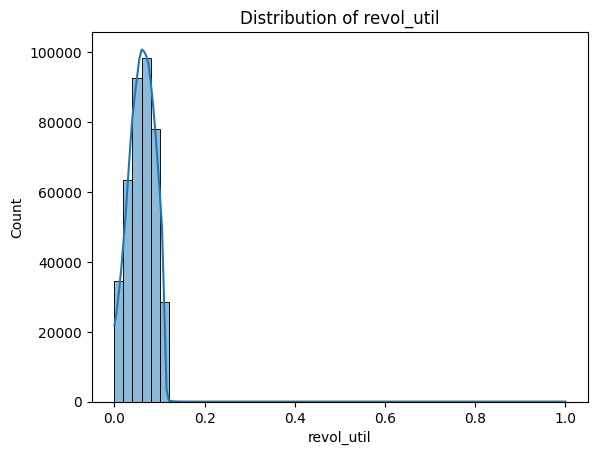

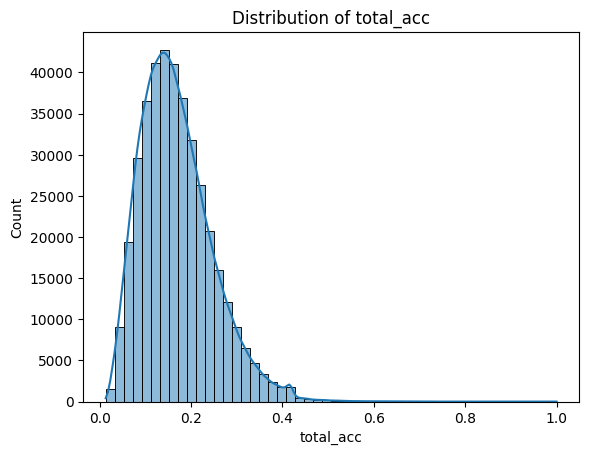

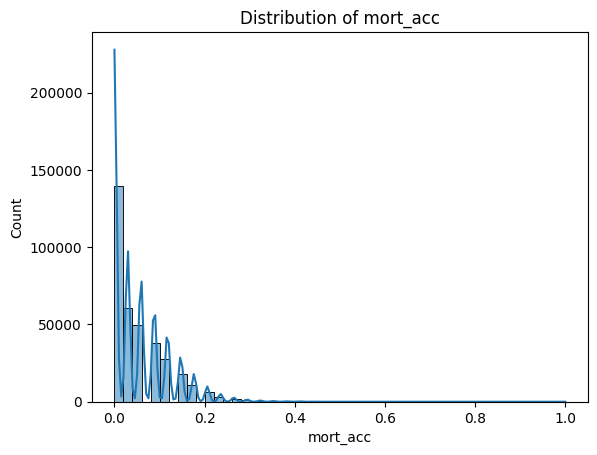

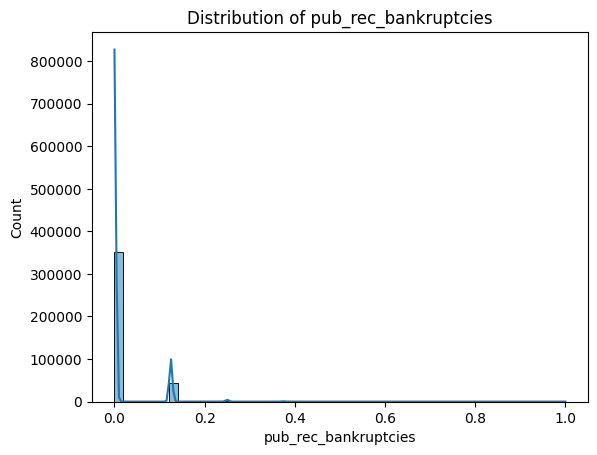

In [35]:
num_vars = df.select_dtypes('float64').columns.tolist()
for i in num_vars:
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True, bins=50)
    plt.show()

Insight

Most of the distribution is highly skewed which tells us that they might contain outliers

Almost all the continuous features have outliers present in the dataset.

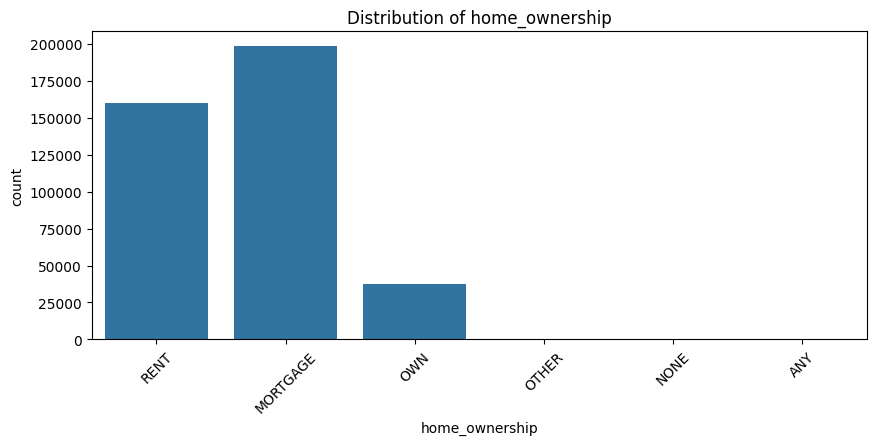

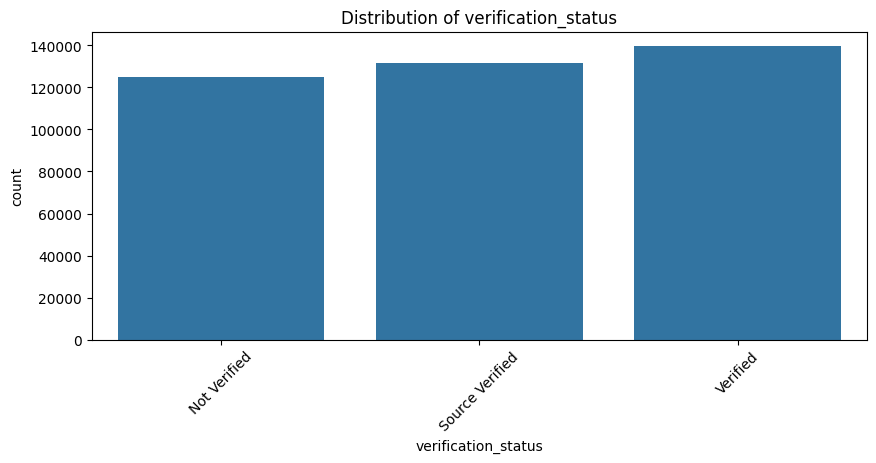

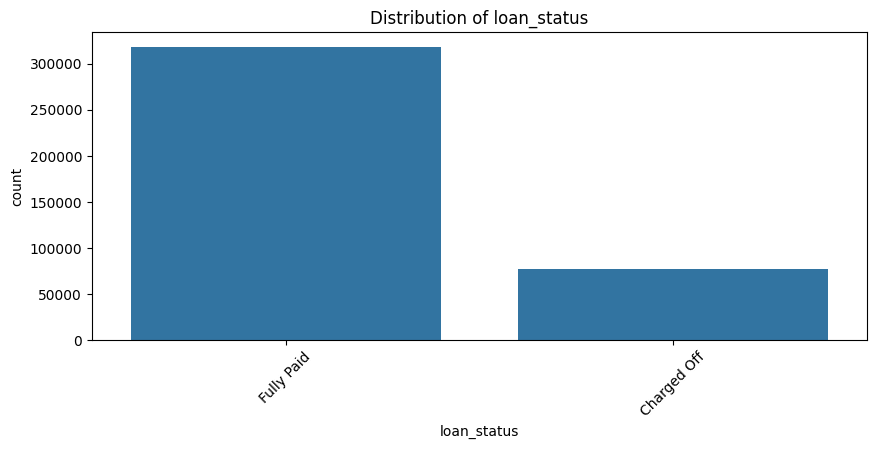

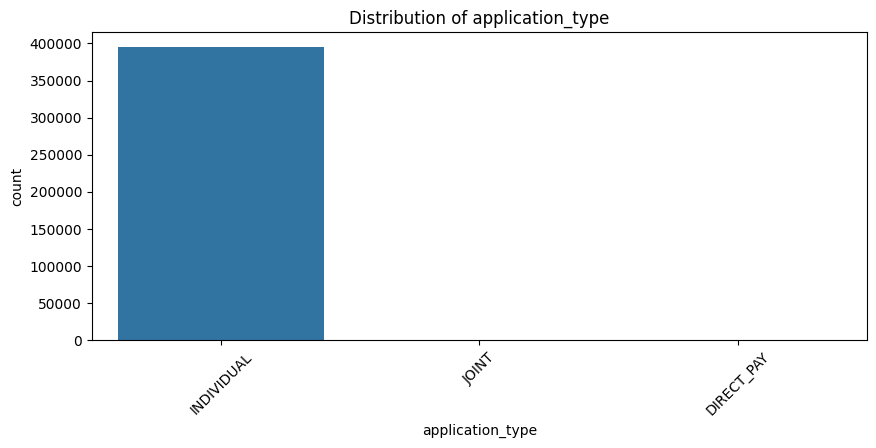

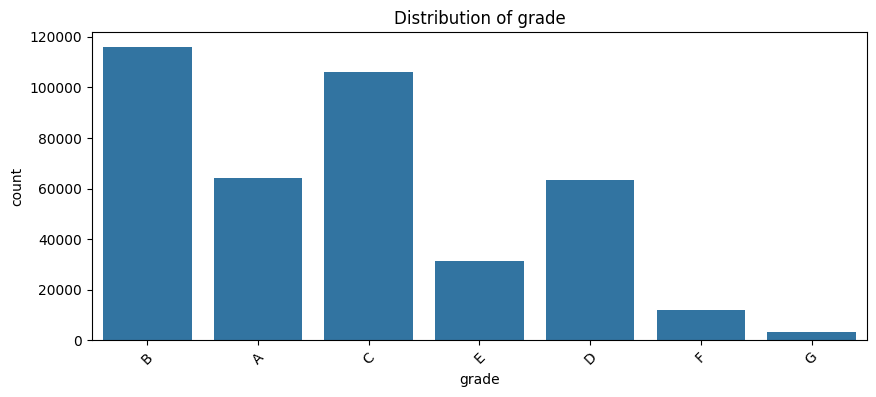

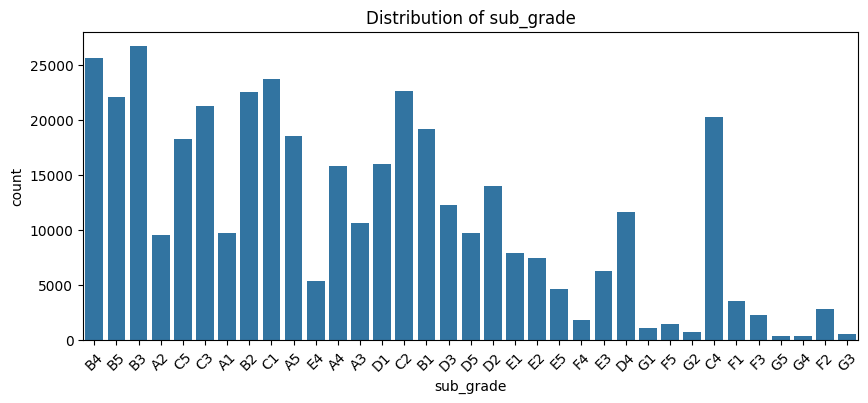

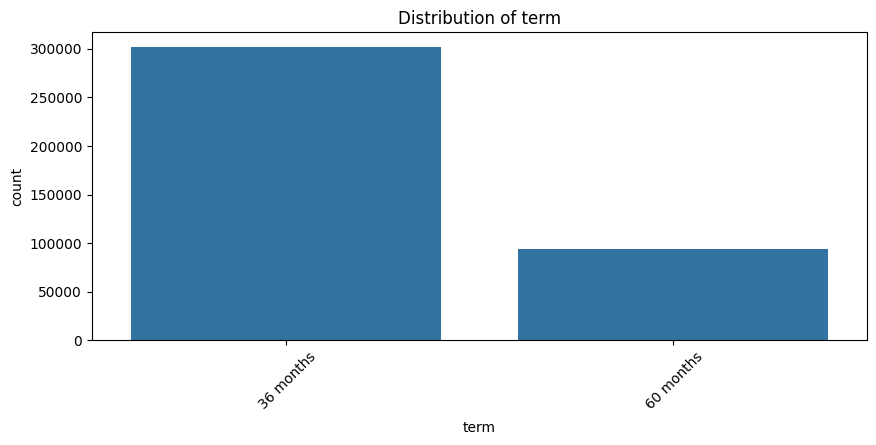

In [36]:
cat_vars = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']
for i in cat_vars:
    plt.figure(figsize=(10, 4))
    plt.title(f'Distribution of {i}')
    sns.countplot(data=df, x=i)
    plt.xticks(rotation = 45)
    plt.show()

Insights

All the application type is Individual

Most of the loan tenure is disbursed for 36 months

The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'.

So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

Visualization - Bivariate Analysis

<ipython-input-37-cafc6a589ab6>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


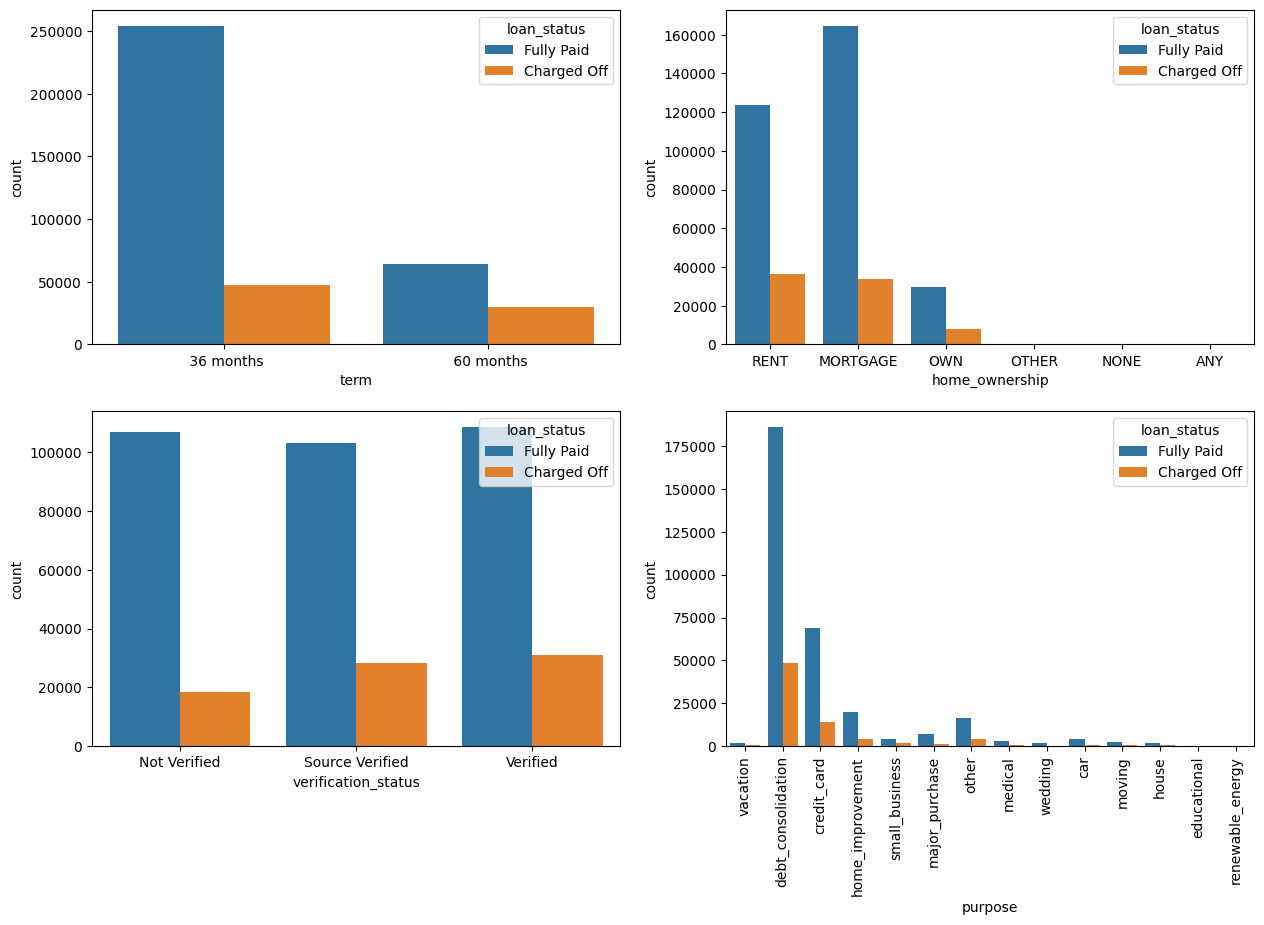

In [37]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

Insights

Most of the people took loan for 36 months and full paid on time

Most of people have home ownership as mortgage and rent

Most of the people took loan for debt consolidations

<ipython-input-38-4fc383fe14dc>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


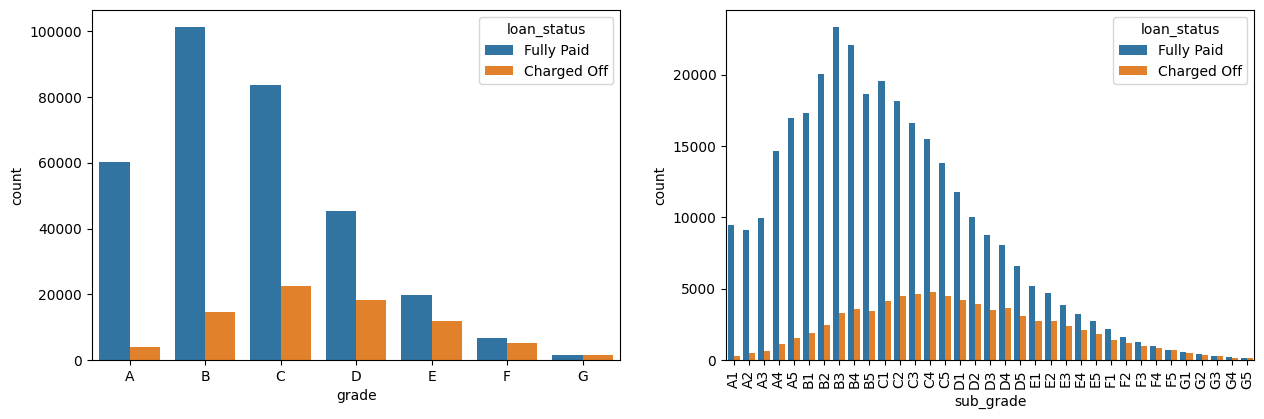

In [38]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()


Insights

The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

<ipython-input-39-4a33978c202d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


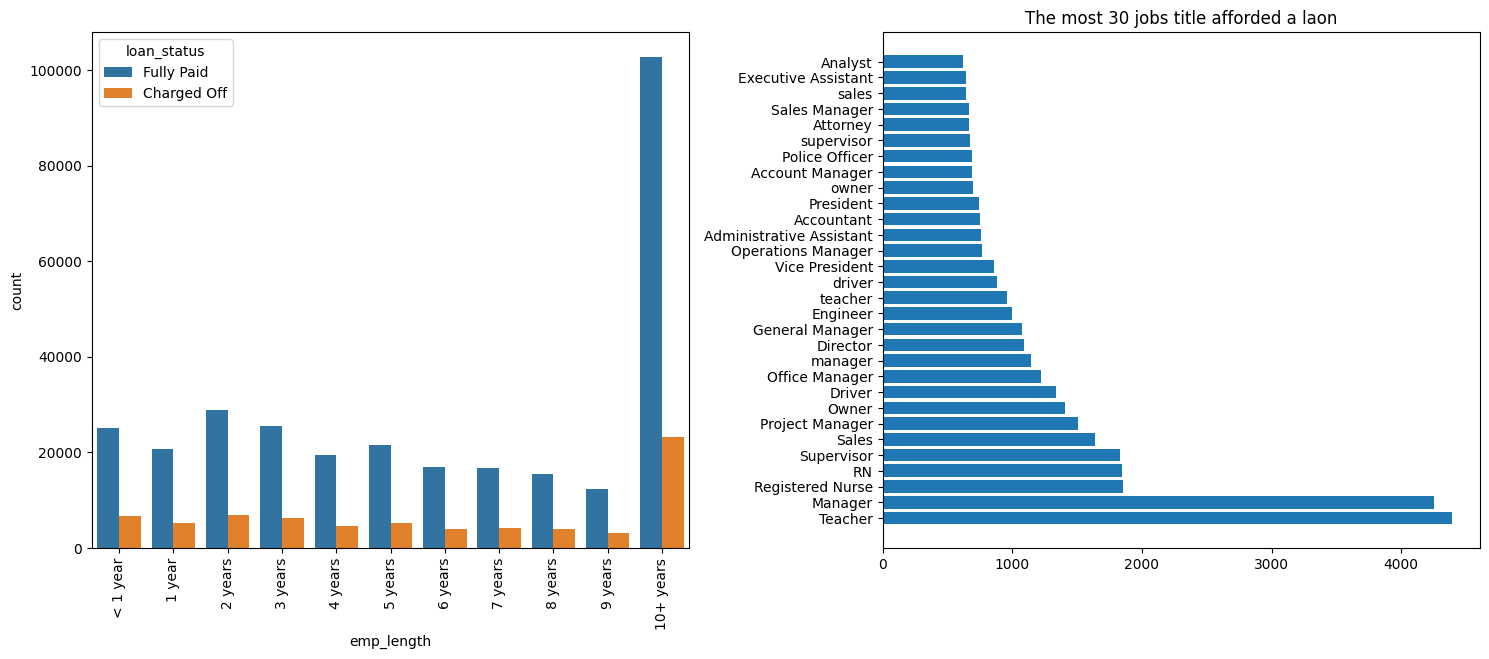

In [39]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,2,2)
plt.barh(df.emp_title.value_counts()[:30].index,df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a laon")
plt.tight_layout()

plt.show()

Insights

Manager and Teacher are the most afforded loan on titles

Person who employed for more than 10 years has successfully paid of the loan

Correlation Analysis

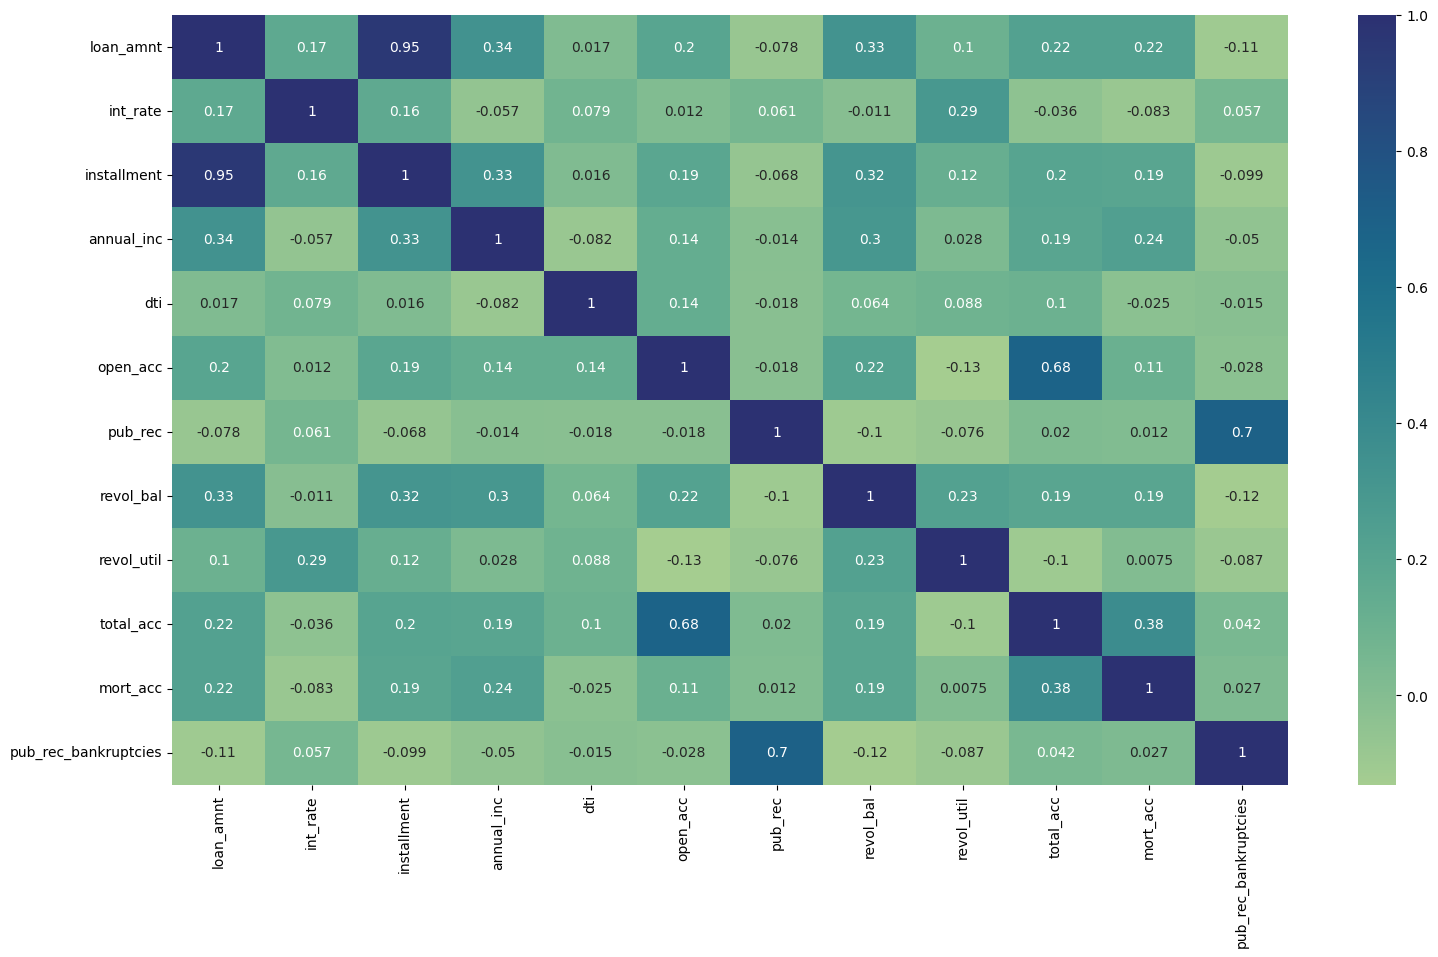

In [40]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), cmap = 'crest', annot = True)

plt.show()

Insights

We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

installment: The monthly payment owed by the borrower if the loan originates.

loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

Action

So, we can drop either one of those columns.

In [41]:
#Check for Duplicate Values
df.duplicated().sum()

0

In [42]:
# Null values replaced by 'Mode' in case of 'Categorical' column.
column_mode = df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(column_mode)

# Null values replaced by 'Mean' in case of 'Numerical' column.
for column in ['revol_util', 'mort_acc', 'pub_rec_bankruptcies']:
    column_mean = df[column].mean()
    df[column] = df[column].fillna(column_mean)

In [43]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,0
home_ownership,0
annual_inc,0


In [44]:
#Dropping some variables which we can let go for now
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

Feature Engineering

In [45]:
def  pub_rec(number):
    if number == 0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [46]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

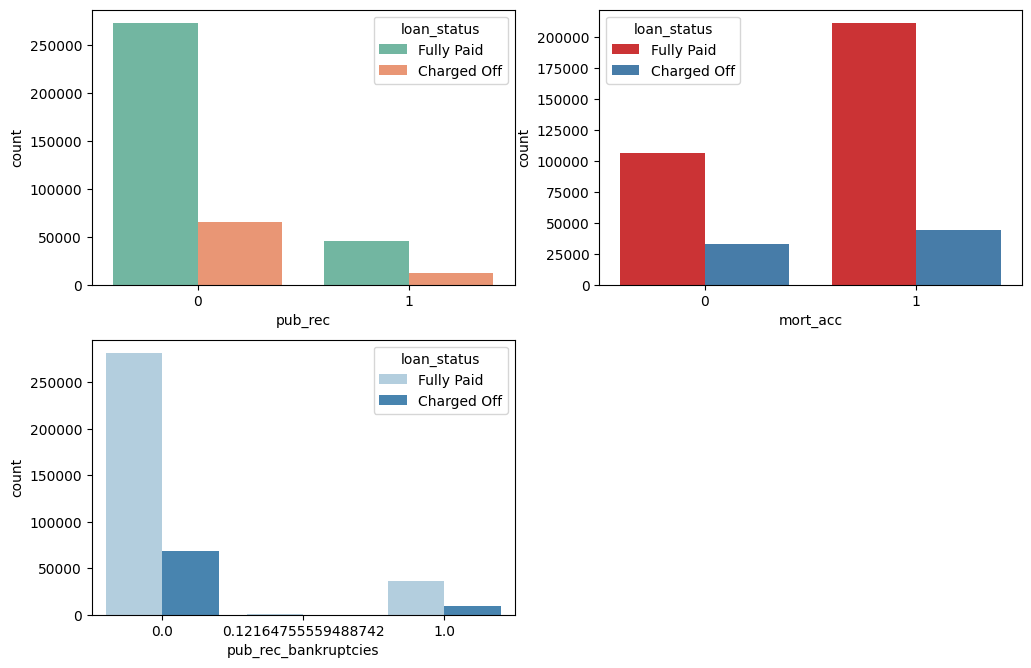

In [47]:
plt.figure(figsize=(12,25))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status', palette='Set2')

plt.subplot(6,2,2)
sns.countplot(x='mort_acc',data=df,hue='loan_status', palette='Set1')

plt.subplot(6,2,3)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status', palette='Blues')

In [48]:
#pre processing
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

Insights

Most the loan disbursed to the people whose do not hold bankrupties record have successfully paid loan

Outlier Detection & Treatment

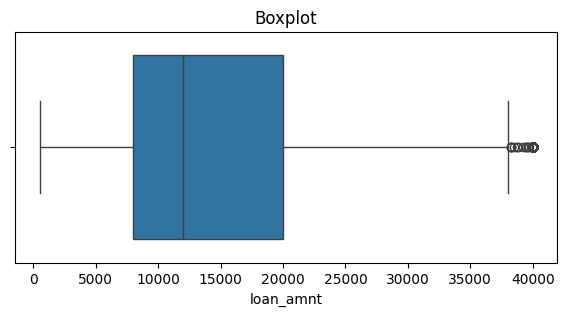

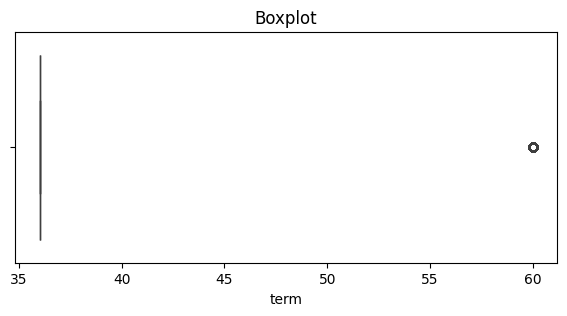

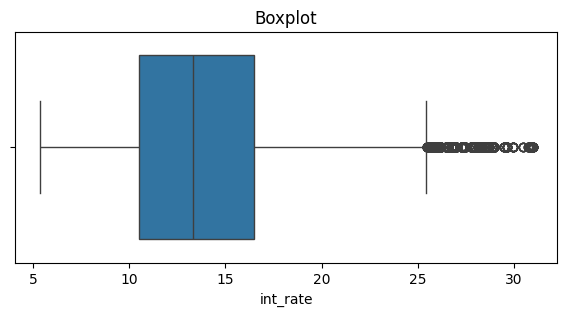

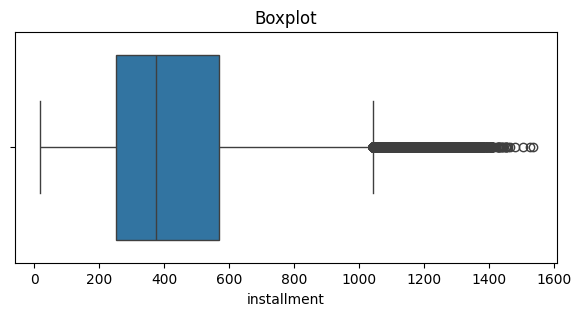

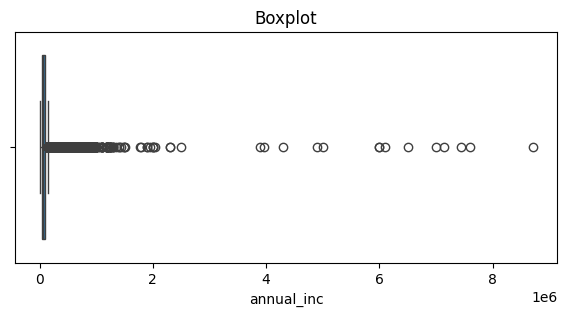

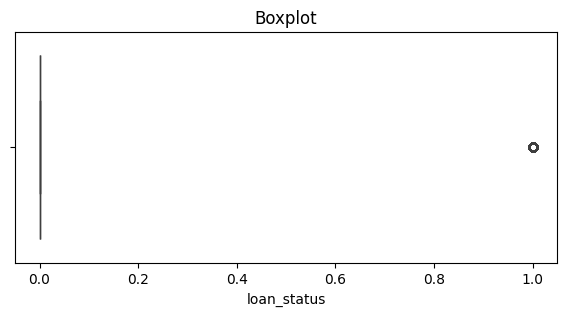

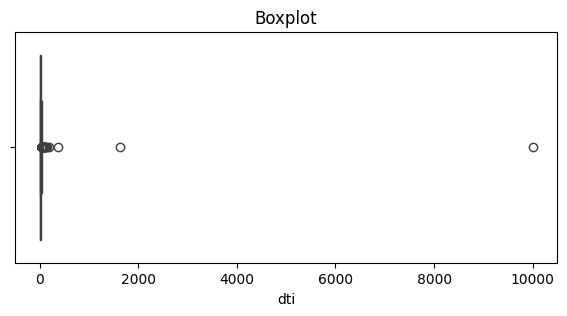

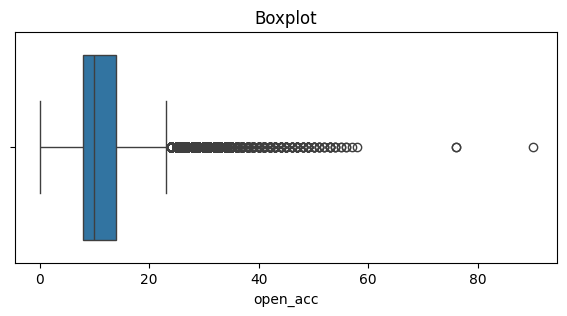

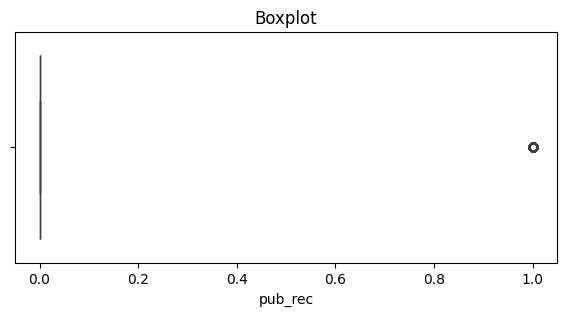

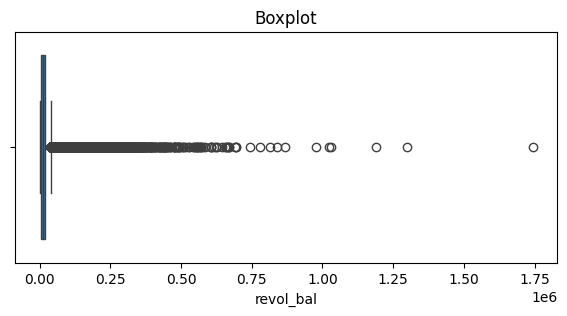

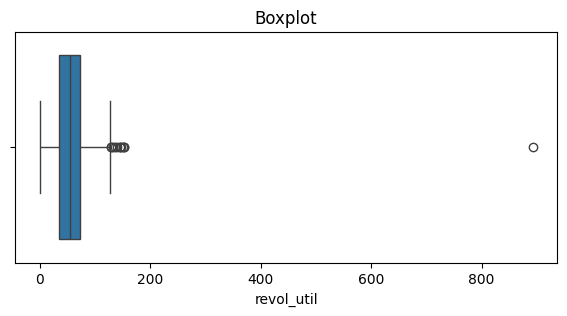

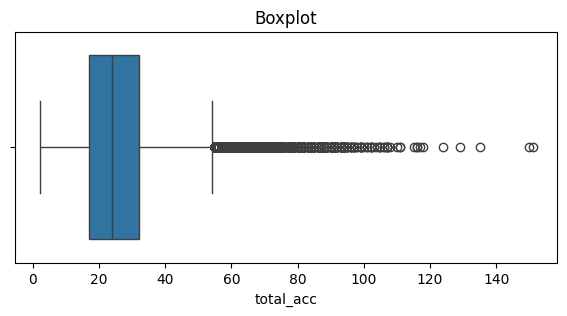

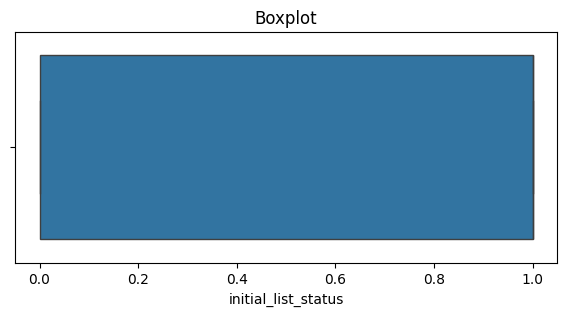

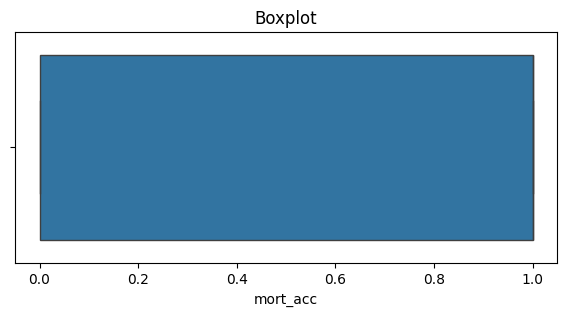

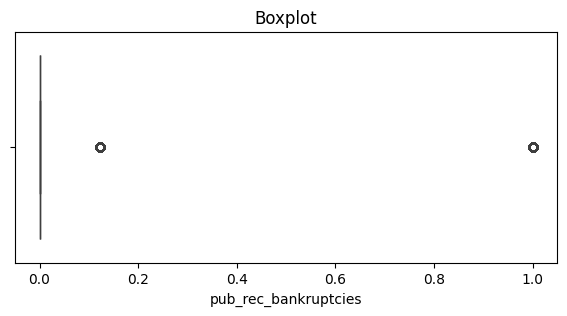

In [49]:
numerical_col=df.select_dtypes(include='number')
num_cols=numerical_col.columns

def box_plot(col):
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()

for col in num_cols:
    box_plot(col)

In [52]:
for col in num_cols:
    mean=df[col].mean()
    std=df[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

One hot encoding

In [56]:
dummies=['purpose', 'grade', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df,columns=dummies,drop_first=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


Data processing for modelling

In [57]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X=df.drop('loan_status',axis=1)
y=df['loan_status']
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=3,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(284424, 42)
(71107, 42)


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [59]:
X_train.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0.293151,1.0,0.637296,0.252182,0.678363,0.156844,0.458333,0.0,0.280198,0.490673,0.314815,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.397260,1.0,0.464336,0.315248,0.590643,0.198220,0.458333,0.0,0.406892,0.665045,0.500000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.178082,0.0,0.060606,0.182706,0.257310,0.272552,0.333333,0.0,0.146775,0.466342,0.259259,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.095890,0.0,0.403730,0.110747,0.614035,0.556411,0.750000,0.0,0.089612,0.364964,0.555556,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.216438,0.0,0.204662,0.233266,0.210526,0.220111,0.250000,0.0,0.071213,0.304136,0.129630,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Oversampling with SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

<ipython-input-60-f39c77ce4cef>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From sc

Before OverSampling, count of label 1: 55988
Before OverSampling, count of label 0: 228436
After OverSampling, count of label 1: 228436
After OverSampling, count of label 0: 228436


Model Building

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_res, y_train_res)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [64]:
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)

# Model Evaluation
print('Train Accuracy :', round(model.score(X_train, y_train), 2))
print('Train F1 Score:', round(f1_score(y_train, train_preds), 2))
print('Train Recall Score:', round(recall_score(y_train, train_preds), 2))
print('Train Precision Score:', round(precision_score(y_train, train_preds), 2))

print('\nTest Accuracy :', round(model.score(X_test, y_test), 2))
print('Test F1 Score:', round(f1_score(y_test, test_preds), 2))
print('Test Recall Score:', round(recall_score(y_test, test_preds), 2))
print('Test Precision Score:', round(precision_score(y_test, test_preds), 2))

Train Accuracy : 0.65
Train F1 Score: 0.42
Train Recall Score: 0.66
Train Precision Score: 0.31

Test Accuracy : 0.65
Test F1 Score: 0.43
Test Recall Score: 0.67
Test Precision Score: 0.32


Confusion Matrix

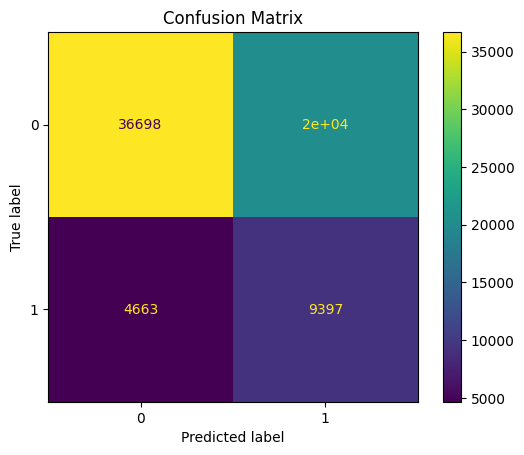

In [65]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Insights

There is significant value for false negative and false positive. Which will hamper our prediction due to type-1 or type-2 error.

Classification Report

In [66]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.89      0.64      0.75     57047
           1       0.32      0.67      0.43     14060

    accuracy                           0.65     71107
   macro avg       0.60      0.66      0.59     71107
weighted avg       0.77      0.65      0.68     71107



Insights

Precision score and recall score for full paid status is almost same indicates that model is doing decent job which correctly classified the both of the scenarios
Precision score for charged off status is more than recall score which is perfect

Feature Importance

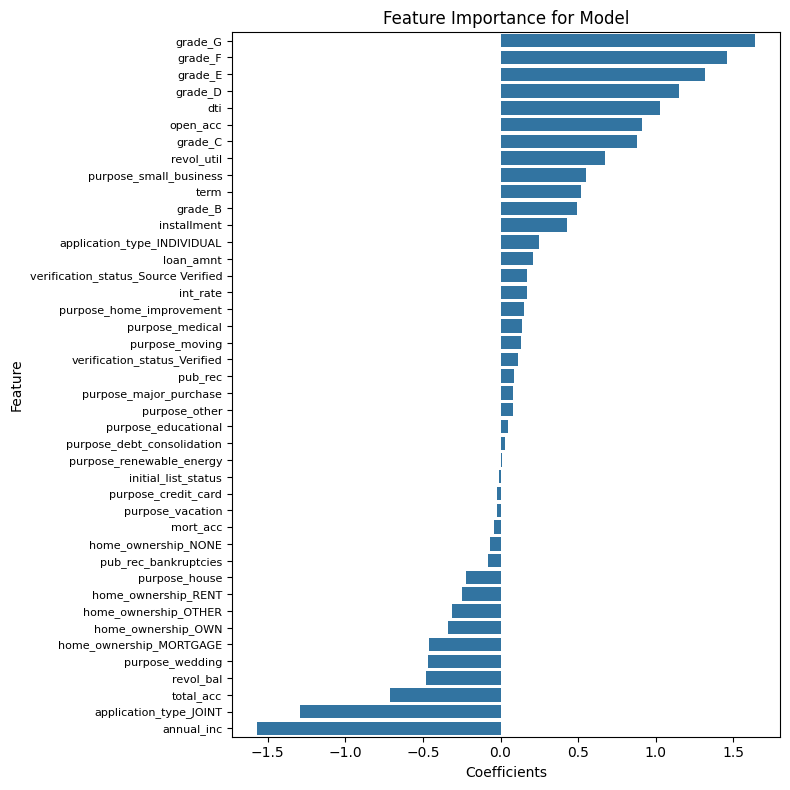

In [67]:
feature_imp = pd.DataFrame({'Columns':X_train.columns,
                            'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

ROC/AUC

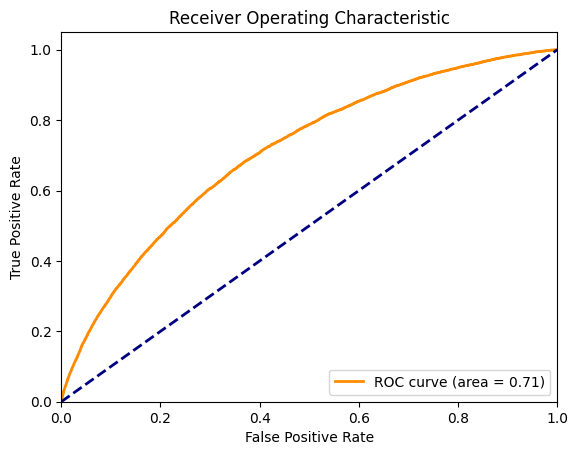

In [68]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Insights

ROC-AUC curve is grossing the area near about 0.73 which indicates that model is performing well.

There is still room for some model improvement
By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

Precession Recall cURVE

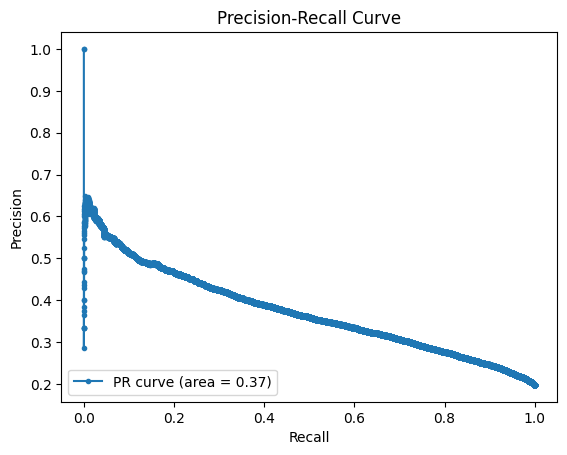

In [69]:
precision, recall, thr = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
apc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % apc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

Insights

Precision score is highest at 0.55 threshold. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.

Recall score is higher on smaller threshold but after 0.55 the recall value is constant. Model is correctly classifying the actual predicated values as instances.

Conclusion
Q1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Ans: The precision score serves as an indicator of Type I error. By increasing the precision score of the model, we can minimize false positives. This ensures that the company avoids erroneously denying loans to deserving individuals, thus maximizing the opportunity to finance worthy applicants.

Q2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

Ans: The recall score serves as an indicator of how effectively the model identifies actual defaulters. By increasing the recall score, we can minimize false negatives (Type II error), thereby ensuring that loans are not disbursed to defaulters, thus enhancing the model's ability to identify risky applicants.

Insights

80% belongs to the class 0 : which is loan fully paid.

20% belongs to the class 1 : which were charged off.

Loan Amount distribution / media is slightly higher for Charged_off loanStatus.

the probability of defaulters is higher in the small_business owner borrowers.

Total credit revolving balance is almost same for both borrowers who had fully paid loan and declared defaulter

Probability of CHarged_off status is higher in case of 60 month term.

It can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are higher for defaulters.

The % of defaulters is much higher for longer (60-month) term.

A Logistic Regression model performed well, rendering accuracy of 80%.

We can remove initial_list_status and state as they have no impact on loan_status

The model had a precision score of 95%, recall score of 80%, and f1 score of 87% on the negative class.

The model had a precision score of 49%, recall score of 81%, and f1 score of 61% on the positive class.

The features "grade" and "sub-grade" have the most significant impact on the loan_status, with higher grades typically associated with a higher likelihood of default. In particular, loans assigned the highest grade tend to have the highest proportion of defaulters.

Recommendations

Since NPA is a real problem in the industry , Company should more investigate and check for the proof of assets. Since it was observed in probability plot, verified borrowers had higher probability of defaulters than non-varified.

Prioritize 'A' grade applicants and shorter-term loans for lower default risk.

Balancing risk of increasing NPAs by disbursing loans to defaulters with the opportunity to earn interest by disbursing loans to as many worthy customers as possible is to maximize the F1 score along with the area under the Precision-Recall Curve.